In [1]:
"""
Created By    : Joshua Kern
Creation Date : 29 November 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #04 - Chaos

Purpose:
Script to examine how chaos manifests in simple model.
To show how chaos theory works and how numerical simulations diverge after x amount of time steps.
First, the code defines the initial conditions and given constants on the assignment. The time step in established \
within the code. Passes are performed using a for loop and the calculations are made using
forward time differencing. The results are then stored in arrays and then plotted for x,y,z. 
Lastly, plots are made and show how simulations diverge as time goes on.

"""
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

In [23]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles

In [24]:
#set our initial conditions
xknot = 2.5
yknot = 1.0
zknot = 0.0
xone = 2.49
#yone = 1.0
#zone = 0.0

In [25]:
#establish given constants 
global a
global b
global F
global G

a = 0.25
b = 4.0
F = 8.0
G = 1.0

In [26]:
#set normalized time step 720 steps
deltat = (4/(24*5))
number_xyz = int(120/5)/deltat
number_xyz = int(number_xyz)

In [27]:
#set empty array for results of each of the time steps (x, y, z, result)
result_x = np.empty((number_xyz, 2))
result_y = np.empty((number_xyz, 2))
result_z = np.empty((number_xyz, 2))

#set initial conditions in the result arrays
result_x[0,0] = xknot
result_x[0,1] = xone
result_y[0,0] = yknot
result_y[0,1] = yknot
result_z[0,0] = zknot
result_z[0,1] = zknot

In [28]:
#passes forward difference and store into result arrays
for j in range(2):
    for i in range(1, number_xyz):
        x_plus_changeint = result_x[i-1,j] + (deltat * ((-result_y[i-1,j]**2) - (result_z[i-1,j]**2) - (a*result_x[i-1,j]) + (a*F)))
        result_x[i,j] = x_plus_changeint
        y_plus_changeint = result_y[i-1,j] + (deltat * ((result_x[i-1,0]*result_y[i-1,j]) - (b*result_x[i-1, j]*result_z[i-1, j]) - (result_y[i-1, j]) + G))
        result_y[i,j] = y_plus_changeint
        z_plus_changeint = result_z[i-1,j] + (deltat * ((b*result_x[i-1,j]*result_y[i-1,j]) + (result_x[i-1,j] * result_z[i-1,j]) - (result_z[i-1,j])))
        result_z[i,j] = z_plus_changeint

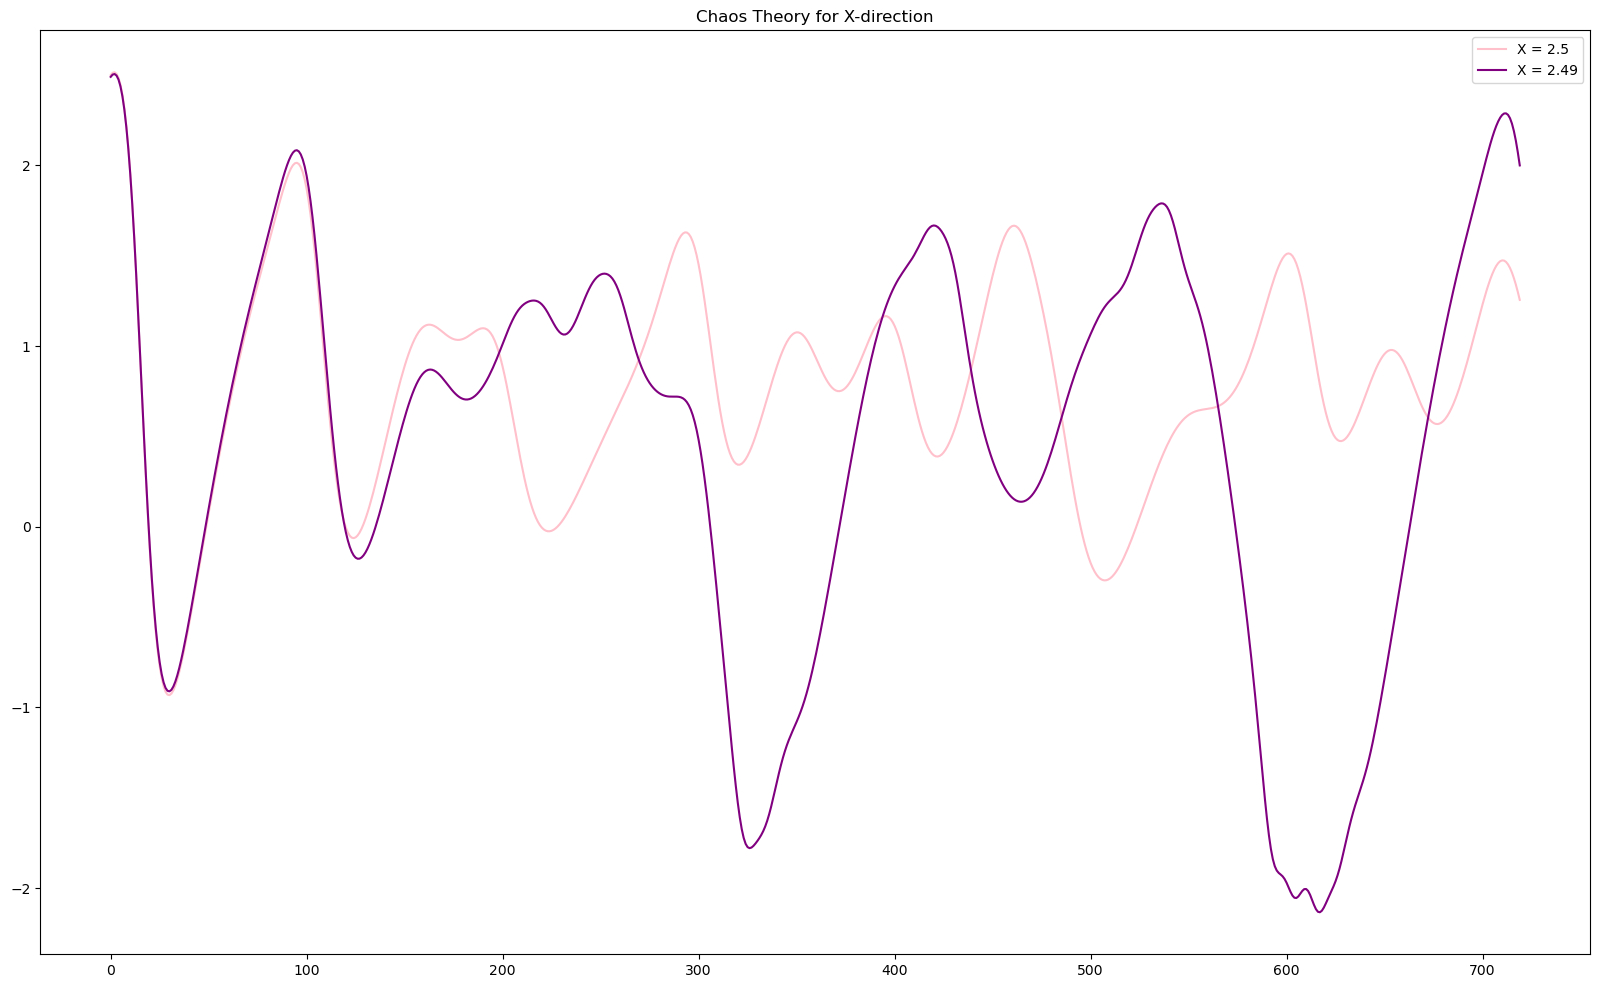

In [29]:
#plot X direction
fig = plt.figure(figsize = (20,12))
plt.plot(result_x[:,0], c = 'pink', label = 'X = 2.5')
plt.plot(result_x[:,1], c = 'purple', label = 'X = 2.49')

plt.legend()
plt.title('Chaos Theory for X-direction')
plt.savefig('Chaos X')
plt.show()

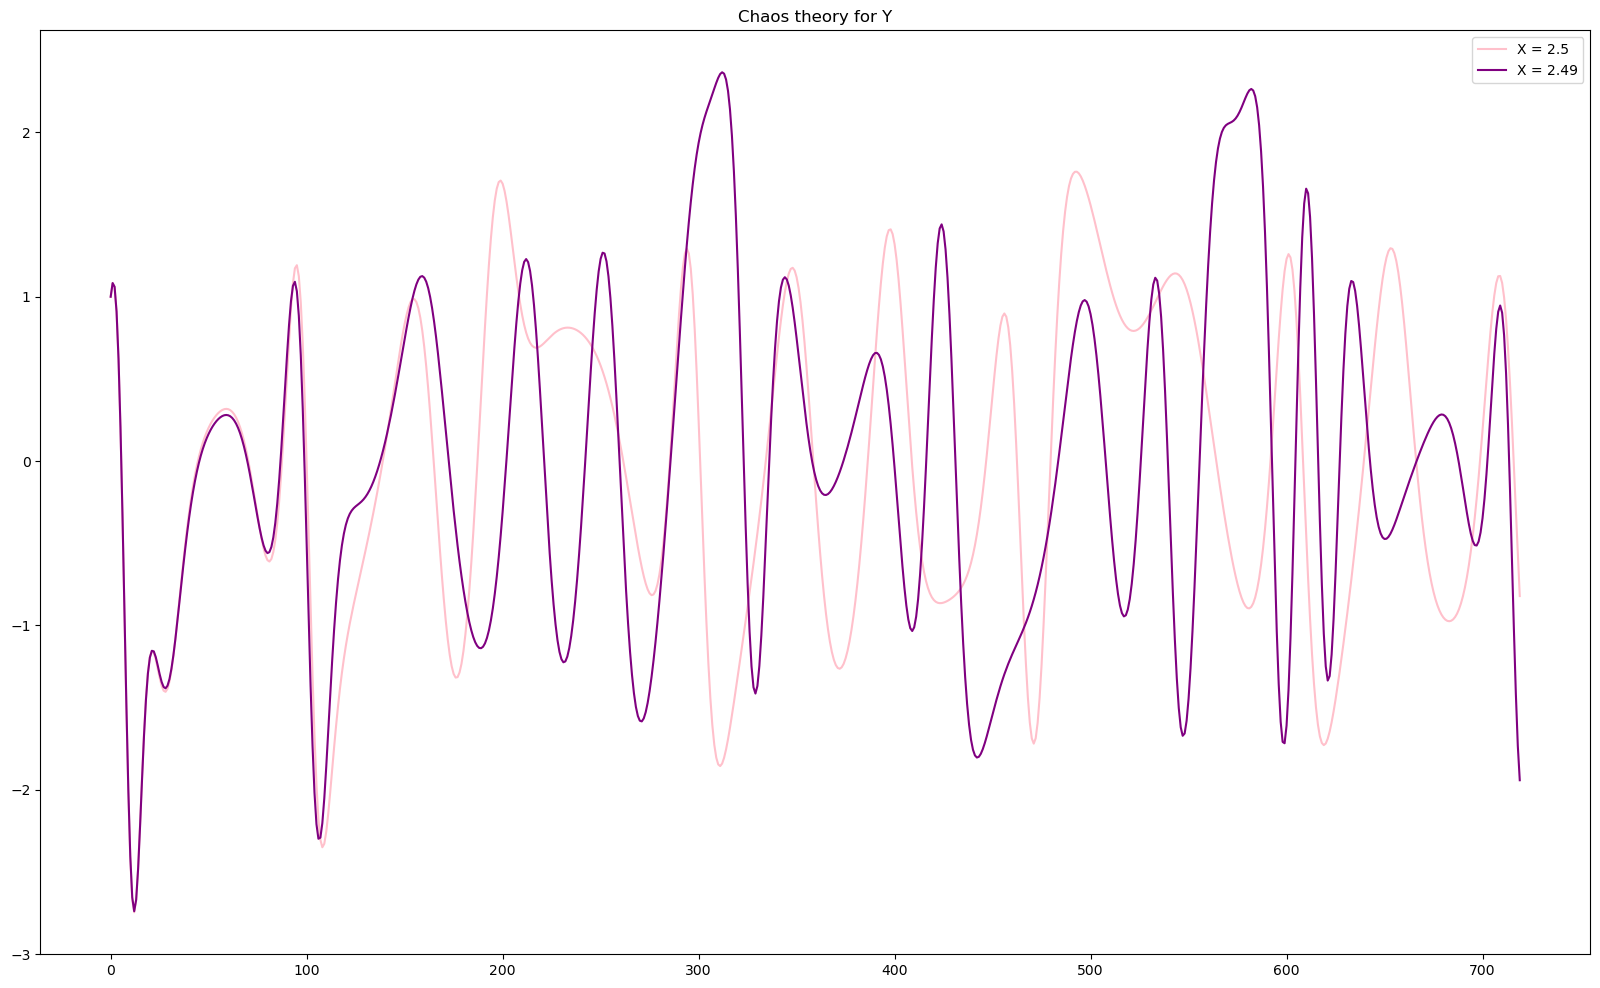

In [30]:
#plot Y direction
fig = plt.figure(figsize = (20,12))
plt.plot(result_y[:,0], c = 'pink', label = 'X = 2.5')
plt.plot(result_y[:,1], c = 'purple', label = 'X = 2.49')

plt.legend()
plt.title('Chaos theory for Y')
plt.savefig('Chaos Y')
plt.show()

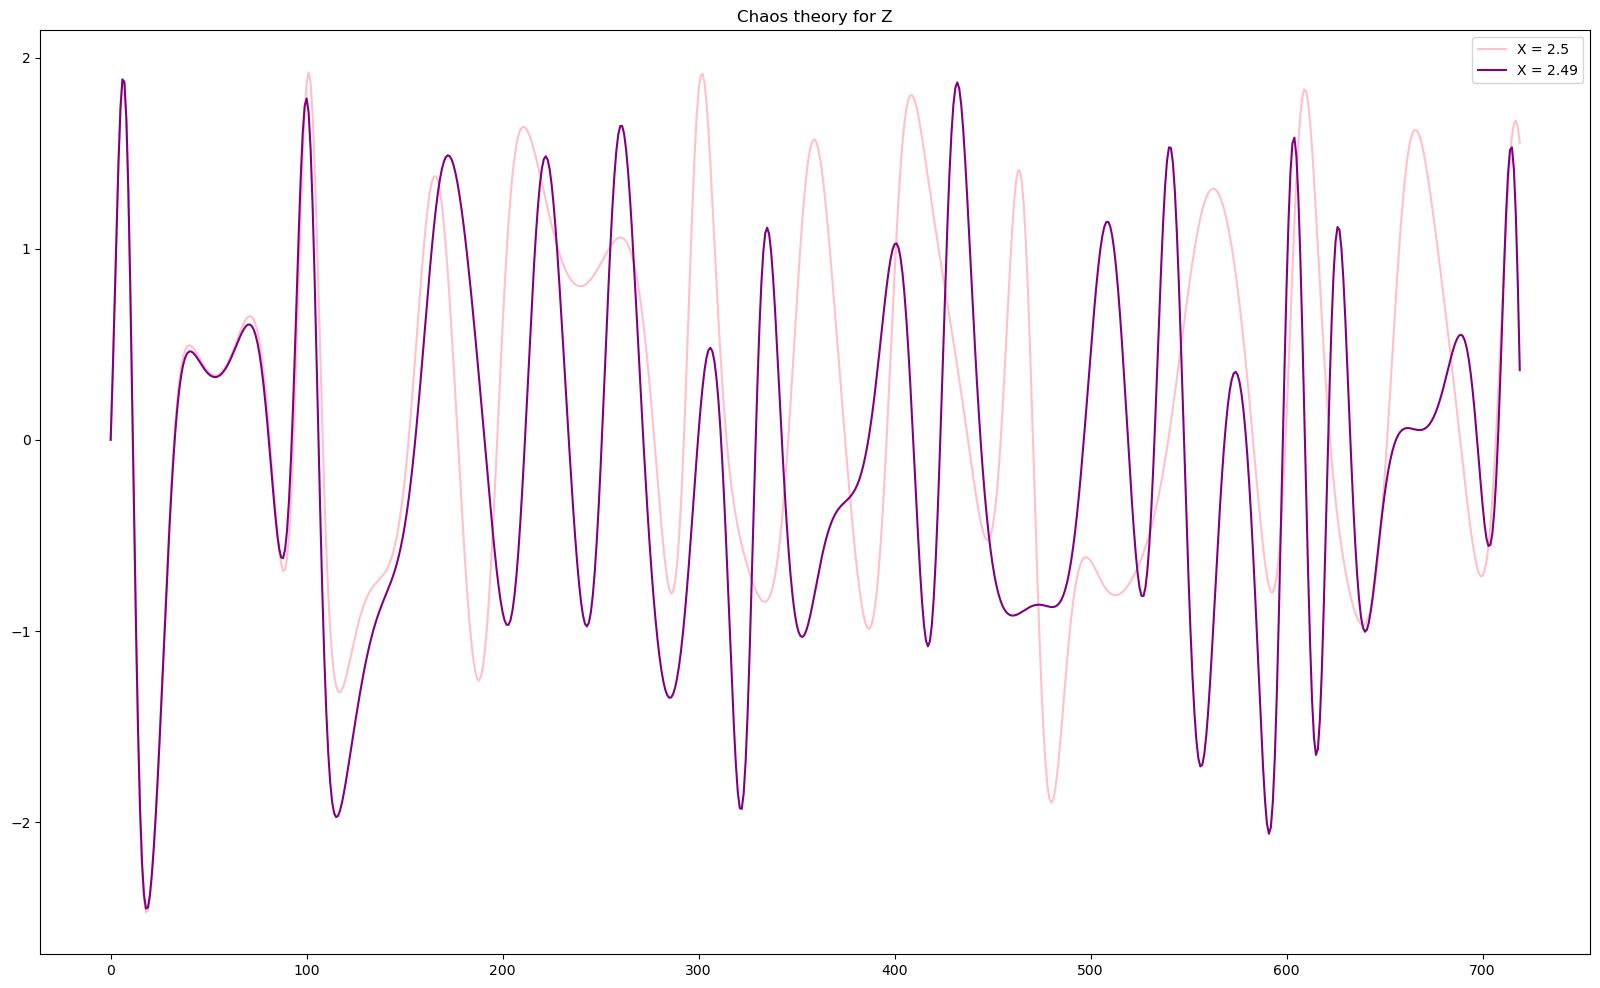

In [31]:
#plot z direction
fig = plt.figure(figsize = (20,12))
plt.plot(result_z[:,0], c = 'pink', label = 'X = 2.5')
plt.plot(result_z[:,1], c = 'purple', label = 'X = 2.49')

plt.legend()
plt.title('Chaos theory for Z')
plt.savefig('Chaos Z')
plt.show()

In [ ]:
'''In a separte text file (or below), provide a discussion of your results ###
### Make sure to answer the following questions in your discussion          ###
### 1 - Are the two simulations the same throughout the entire period?      ###
###     If not, when do they diverge? 

We can see that divergence begins between the two simulations on each plot at about time step 50 of the total 720 steps

### 2 - If the ending points are different, what does this say regarding    ###
###     the importance of providing NWP models, assuming this serves as a   ###
###     proxy for one, with accurate and balanced initial conditions?       ###

The fundamentals of chaos theory is a small difference in intial condition/disturbance will cause
large variations in time. Forecasting the weather through NWP is difficult to do and will likely never be
100% perfect, especially the further out in time you are trying to forecast. But it is important to have
accurate initial conditions so the most accurate as possible forecast can be given.
    

'''